## Encoder and Decoder using Autoencoder

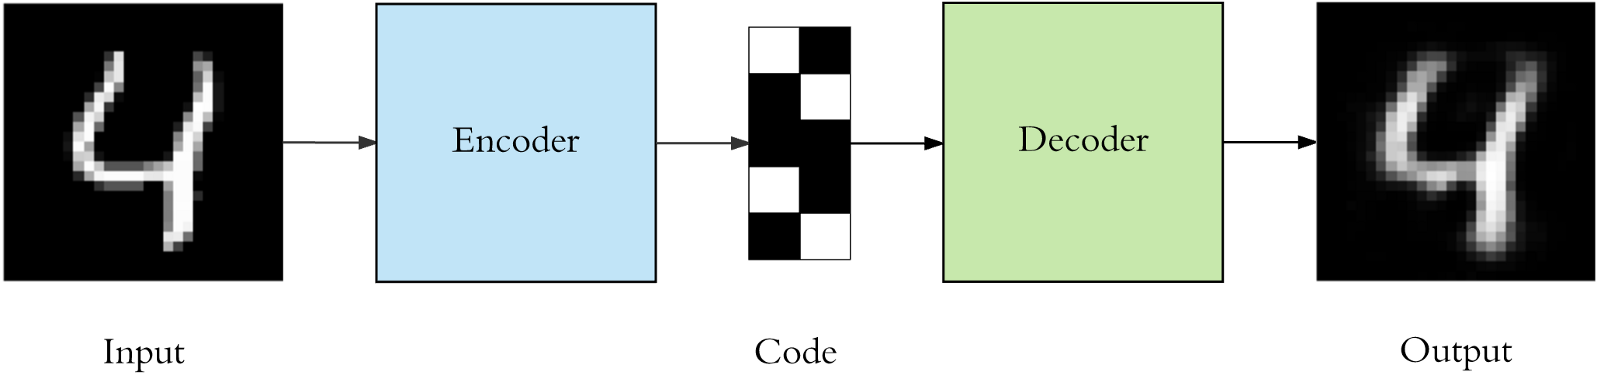

In [1]:
from IPython.display import Image
Image(filename='encodeco.png')

Data Set: MNIST

    Note: Discard the labels

In [2]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Normalize all values between 0 and 1

In [3]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [4]:
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Flatten the 28x28 images into vectors of size 784.


In [5]:
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))

print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


#### Fully-connected neural layer as encoder and as decoder:

In [6]:
from keras.layers import Input, Dense
from keras.models import Model

In [7]:
# The size of encoded and actual representations
encoding_dim = 32 
actual_dim = x_train.shape[1] #784

In [8]:
# Input placeholder
input_img = Input(shape=(actual_dim,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(actual_dim, activation='sigmoid')(encoded)

In [9]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [10]:
print(autoencoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
None


Create a separate encoder model:

In [11]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [12]:
print(encoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
None


Create a separate decoder model

In [13]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1](encoded_input)

# create the decoder model
decoder = Model(encoded_input, decoder_layer)

In [14]:
print(decoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________
None


Configure the model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:

In [15]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


Train our autoencoder for 50 epochs:

In [16]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.3717 - val_loss: 0.2719
Epoch 2/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.2643 - val_loss: 0.2537
Epoch 3/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.2440 - val_loss: 0.2324
Epoch 4/50
60000/60000 [==============================] - 4s 74us/step - loss: 0.2247 - val_loss: 0.2151
Epoch 5/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.2098 - val_loss: 0.2022
Epoch 6/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.1987 - val_loss: 0.1926
Epoch 7/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.1899 - val_loss: 0.1847
Epoch 8/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.1828 - val_loss: 0.1782
Epoch 9/50
60000/60000 [==============================] - 4s 73us/step - loss: 0.1767 - val_loss: 0.1727
Epoch

Visualize the reconstructed inputs and the encoded representations using Matplotlib.

In [17]:
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)

decoded_imgs = decoder.predict(encoded_imgs)

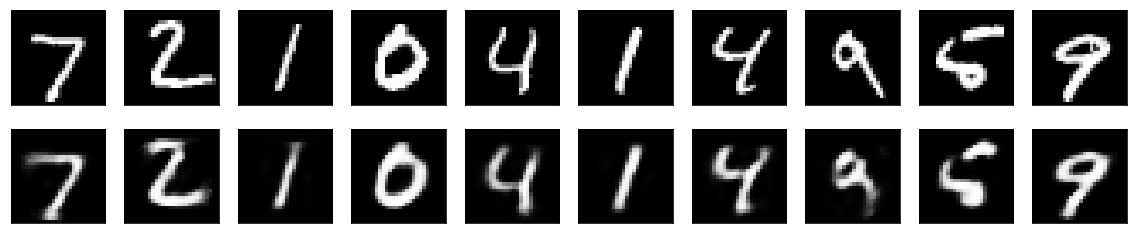

In [19]:
# use Matplotlib 
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Ref:

    https://blog.keras.io/building-autoencoders-in-keras.html